### Importing requirements

In [16]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sweetviz as sv

### Setting up the dataframe for EDA

In [17]:
df=pd.read_csv('employee_data.csv')
df

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,3,34,Male,No,0,0
1,Bachelors,2013,1,28,Female,No,3,1
2,Bachelors,2014,3,38,Female,No,2,0
3,Masters,2016,3,27,Male,No,5,1
4,Masters,2017,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,3,26,Female,No,4,0
4649,Masters,2013,2,37,Male,No,2,1
4650,Masters,2018,3,27,Male,No,5,1
4651,Bachelors,2012,3,30,Male,Yes,2,0


In [18]:
# Check total values in dataset
df.shape

(4653, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   PaymentTier                4653 non-null   int64 
 3   Age                        4653 non-null   int64 
 4   Gender                     4653 non-null   object
 5   EverBenched                4653 non-null   object
 6   ExperienceInCurrentDomain  4653 non-null   int64 
 7   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 290.9+ KB


In [20]:
df.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,3,34,Male,No,0,0
1,Bachelors,2013,1,28,Female,No,3,1
2,Bachelors,2014,3,38,Female,No,2,0
3,Masters,2016,3,27,Male,No,5,1
4,Masters,2017,3,24,Male,Yes,2,1


In [21]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [22]:
df.dtypes   

Education                    object
JoiningYear                   int64
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [23]:
# Check if columns have empty values
df.isnull().sum()

Education                    0
JoiningYear                  0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [24]:
# Check duplicated values and its total
df.duplicated().sum()   

2426

In [25]:
df = pd.concat([df] * 2, ignore_index=True)

In [26]:
# Print unique values
print("\nUnique Values in All Columns:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values in All Columns:
Education: 3 unique values
JoiningYear: 7 unique values
PaymentTier: 3 unique values
Age: 20 unique values
Gender: 2 unique values
EverBenched: 2 unique values
ExperienceInCurrentDomain: 8 unique values
LeaveOrNot: 2 unique values


### Count plots for non-numerical and numerical columns

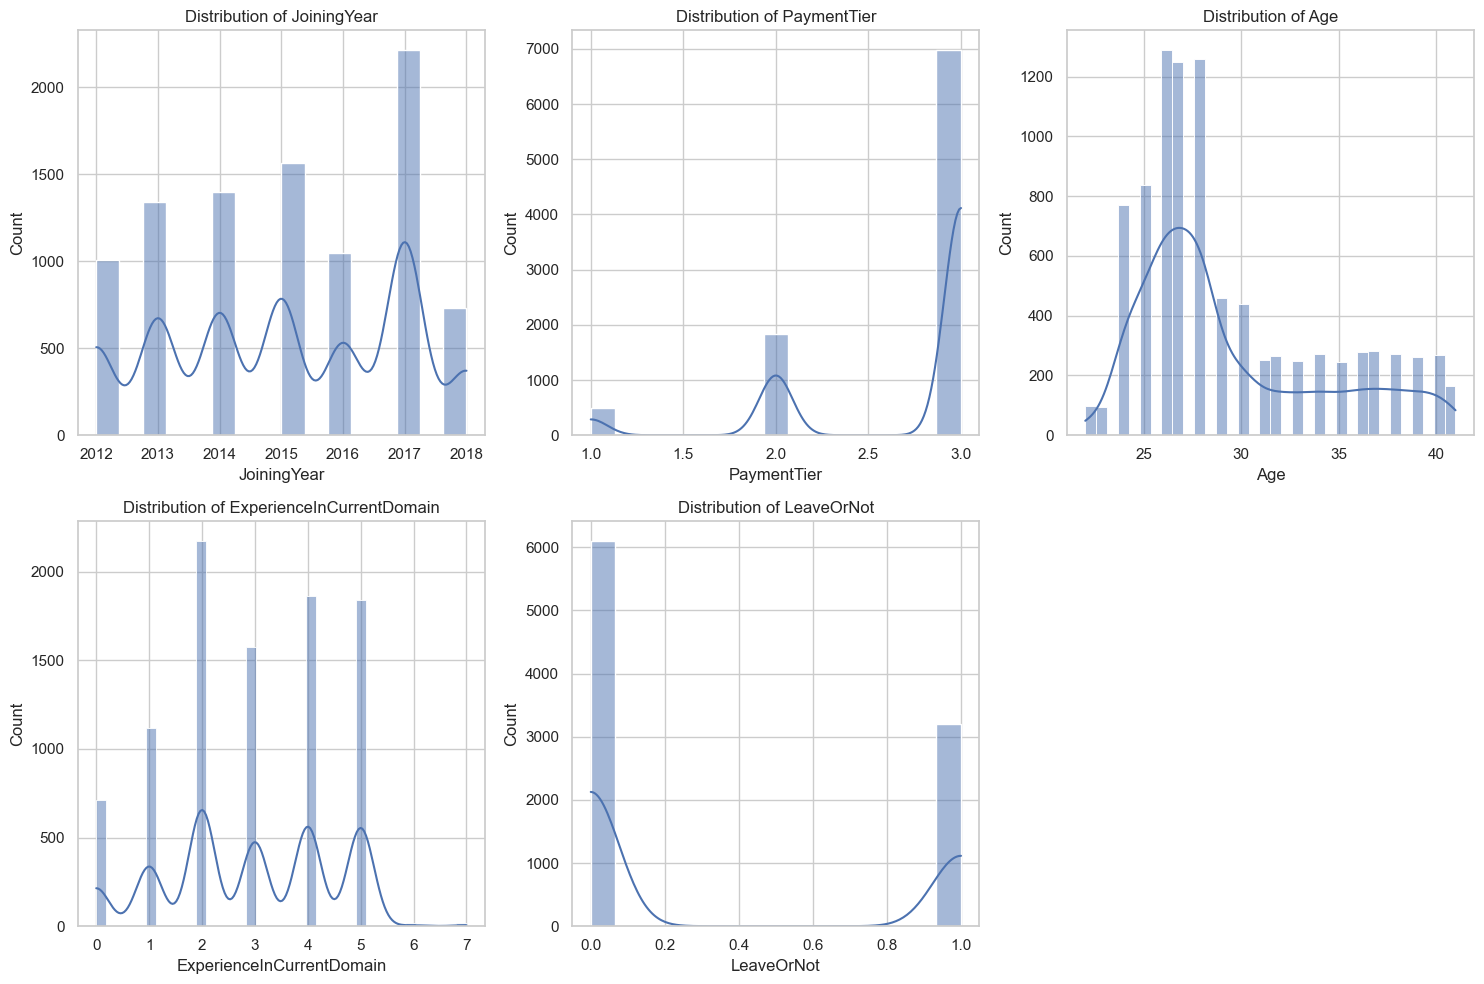

In [27]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create count plot subplots for each numerical column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

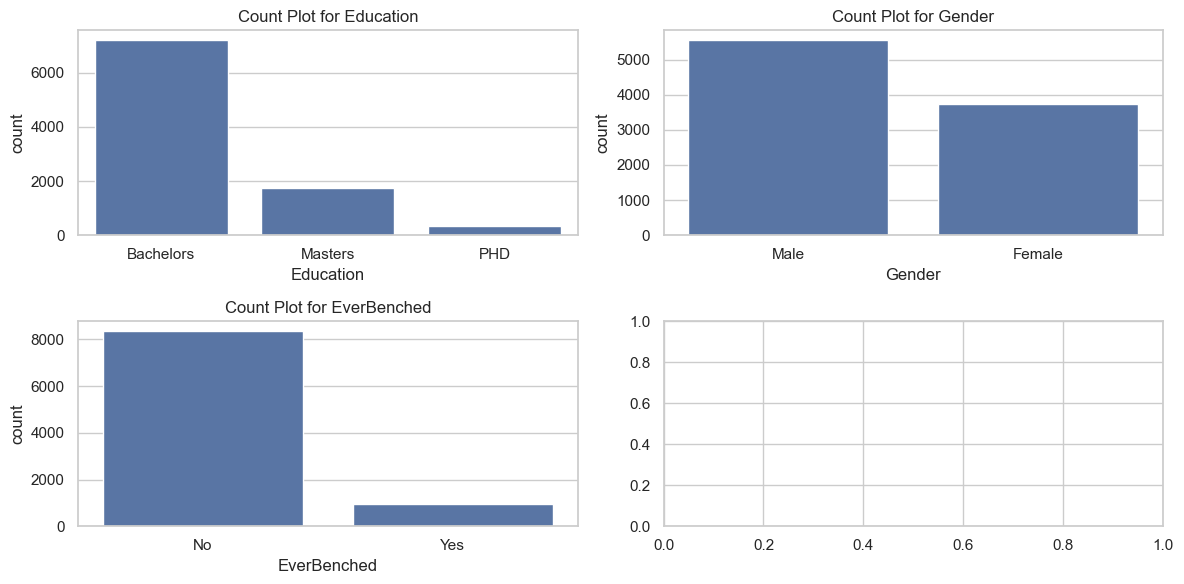

In [28]:
# Get non-numerical columns
non_numerical_columns = df.select_dtypes(include='object').columns

# Set up subplots
num_plots = len(non_numerical_columns)
num_rows = num_plots // 2 + num_plots % 2  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 3 * num_rows))
axes = axes.flatten()

# Iterate over non-numerical columns and create count plots
for i, column in enumerate(non_numerical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


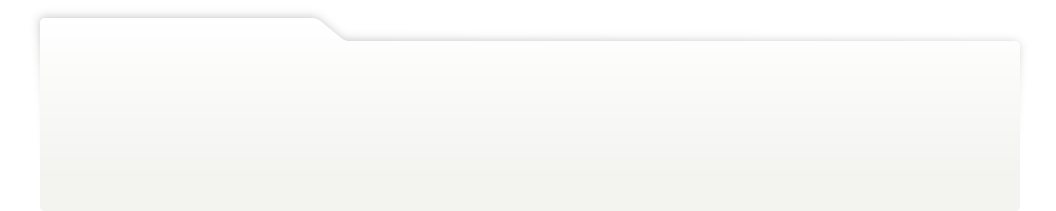
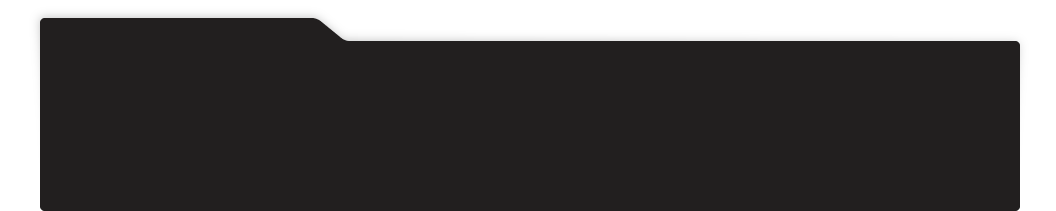
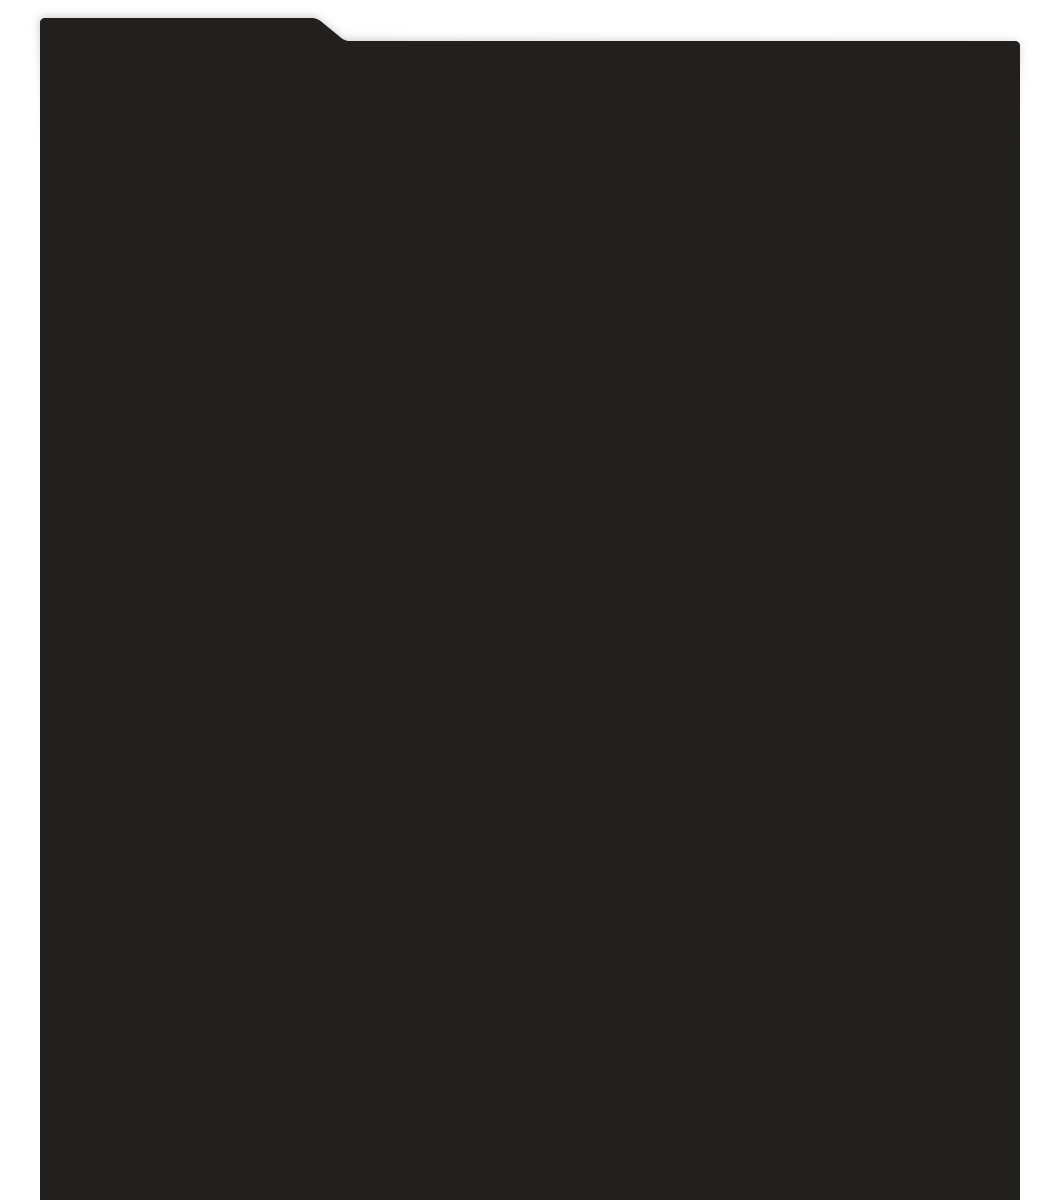
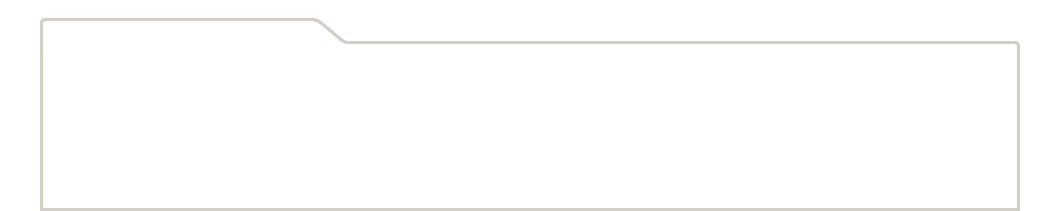
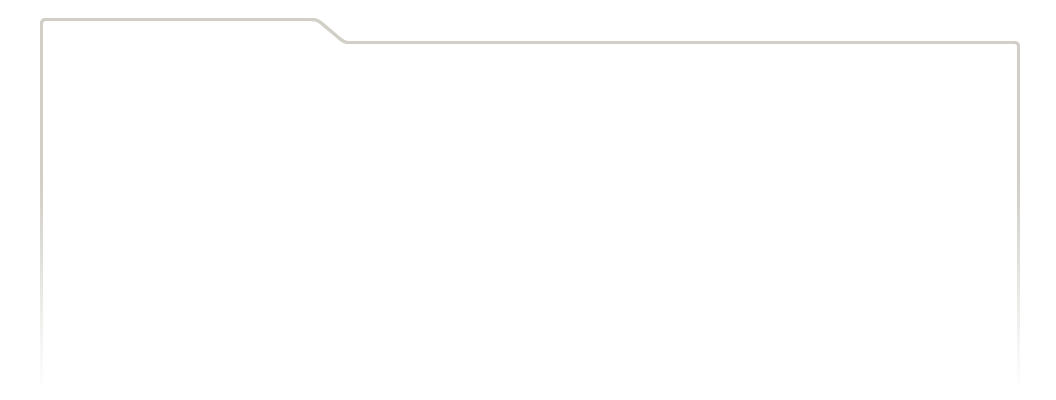
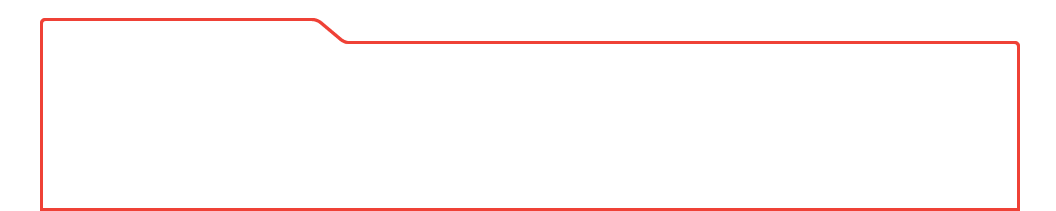
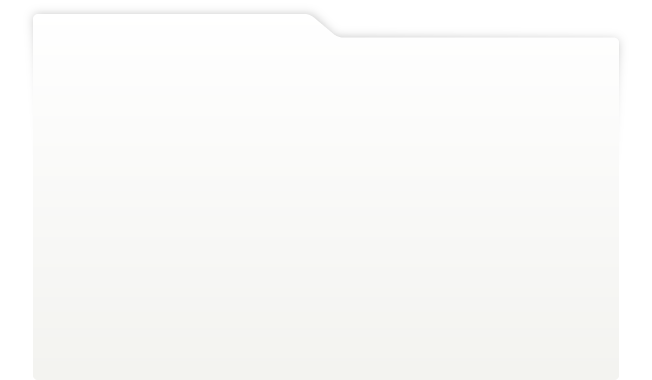
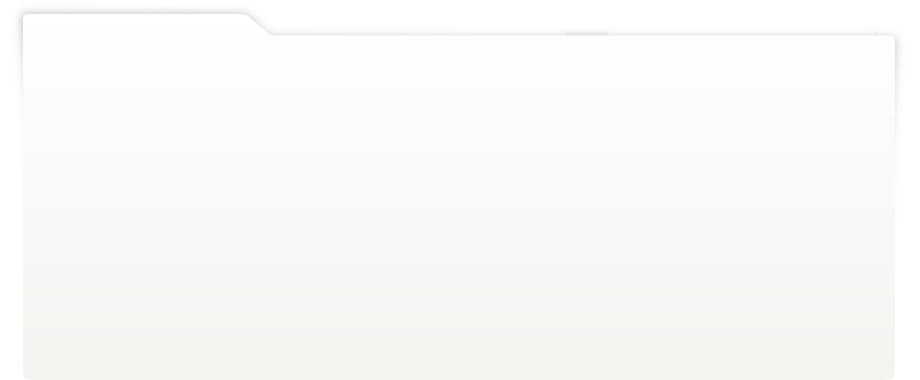
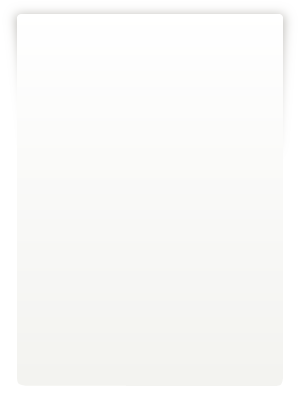
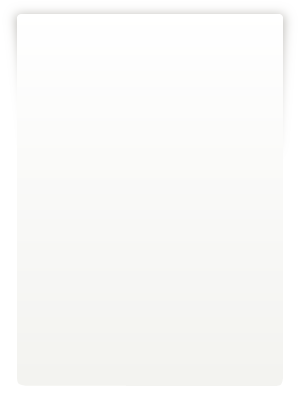
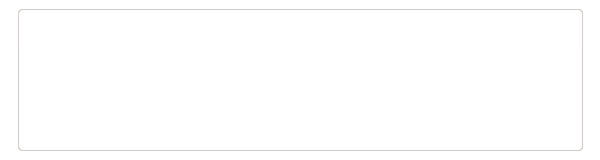
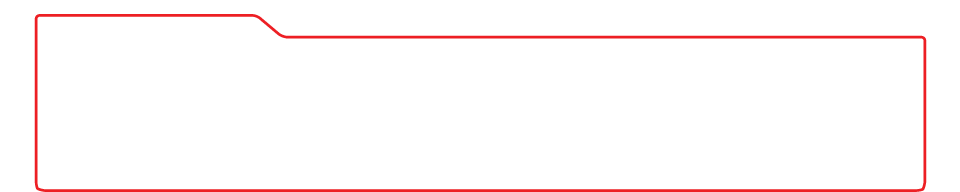
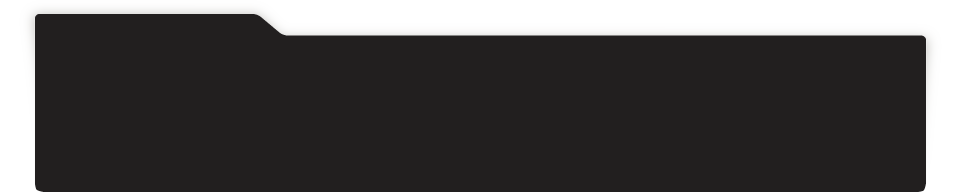
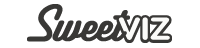
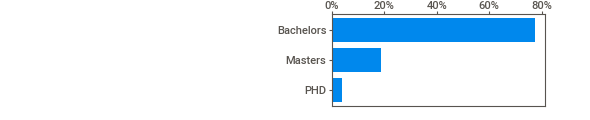
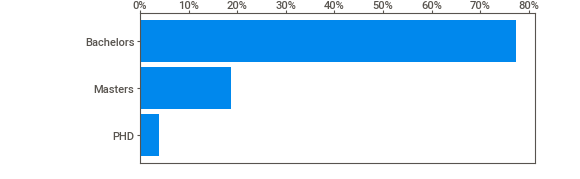
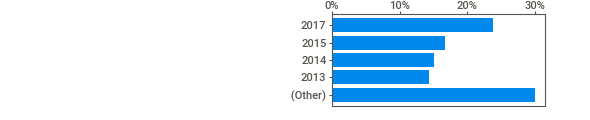
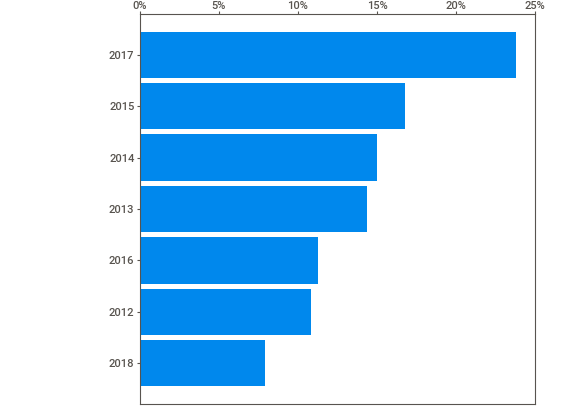
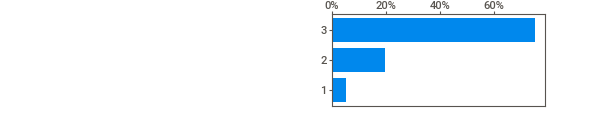
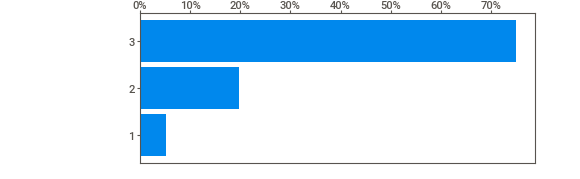
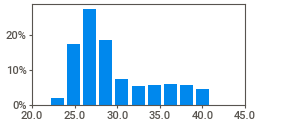
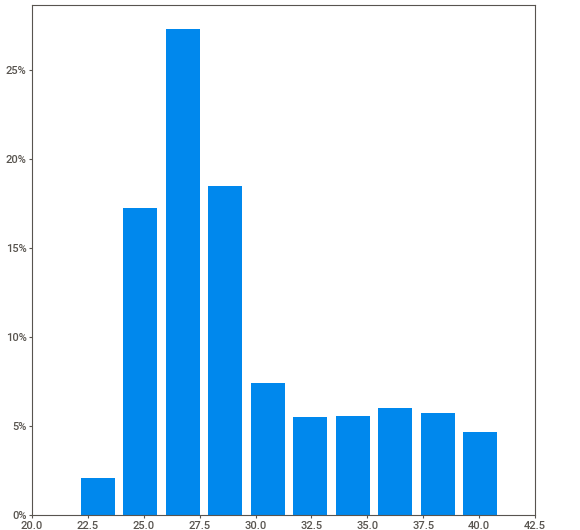
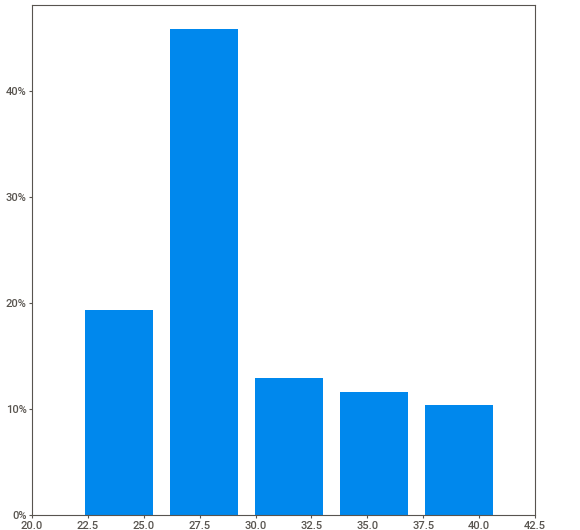
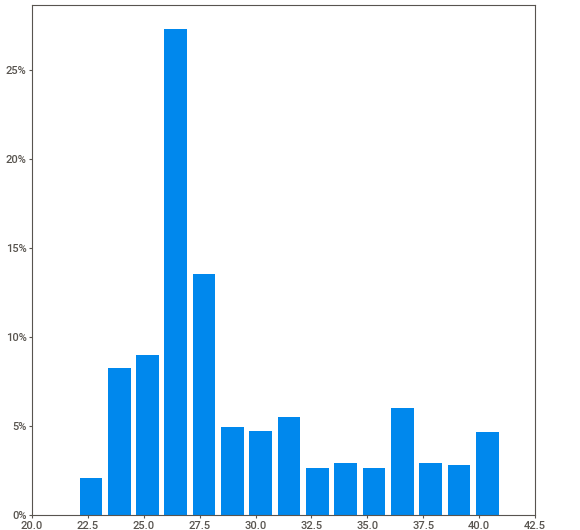
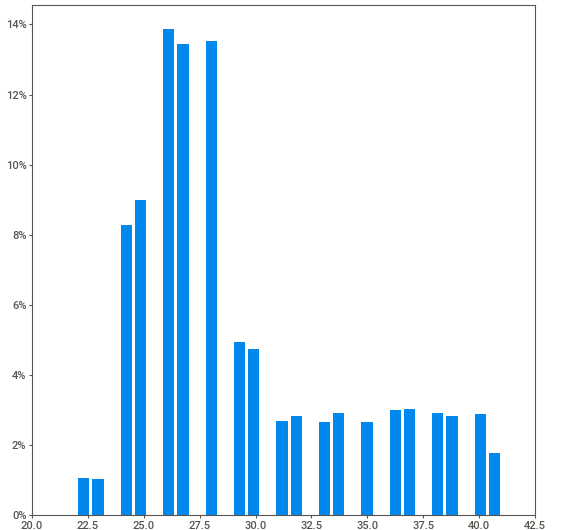
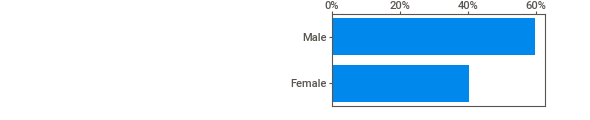
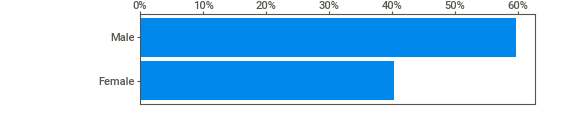
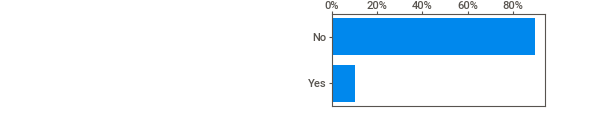
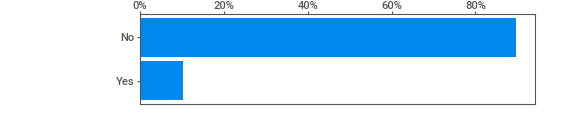
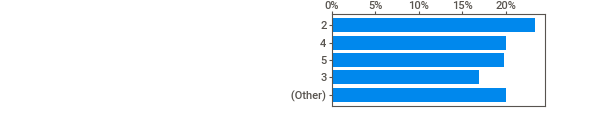
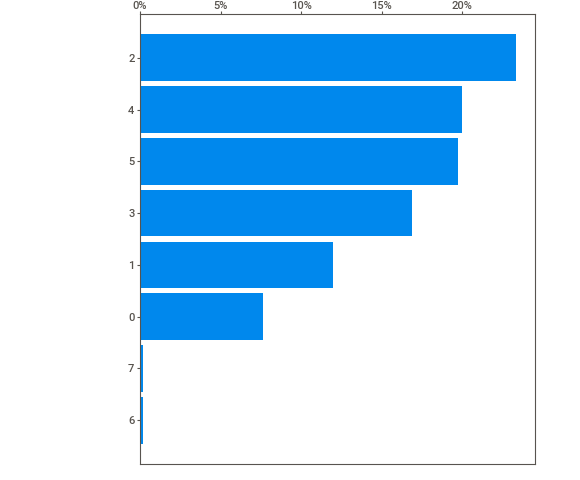
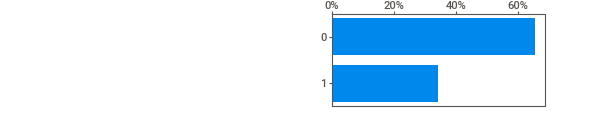
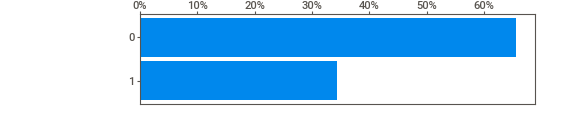
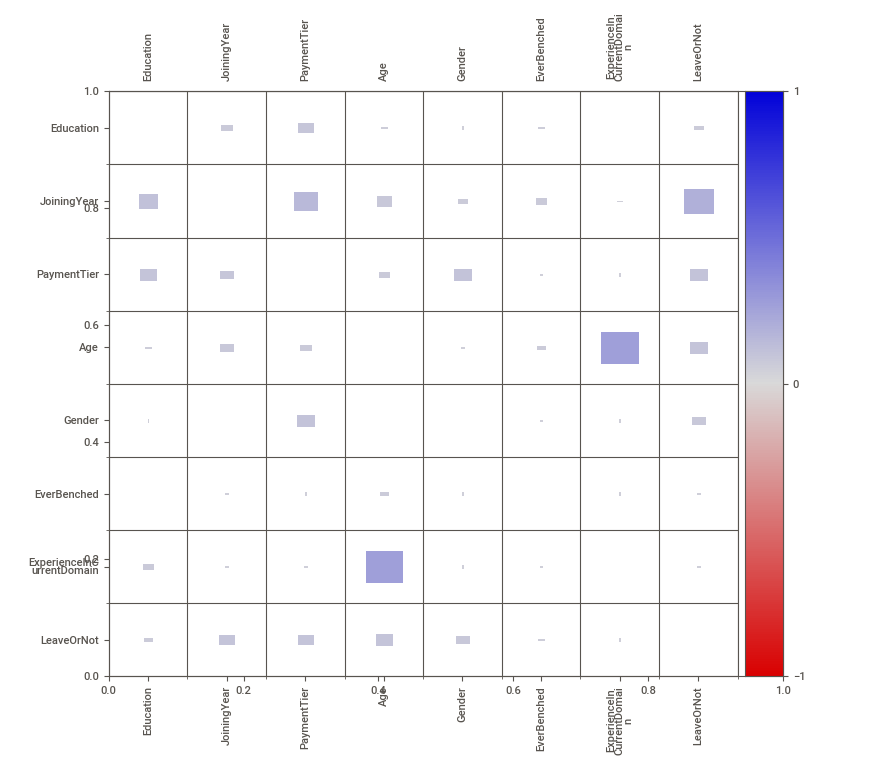
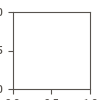

In [29]:
advert_report = sv.analyze(df)
advert_report.show_notebook()

### Training Creating the Model

In [30]:
# Split the dataset for input and output
X = df.drop('LeaveOrNot', axis =1)
y = df['LeaveOrNot']

In [31]:
# Convert categorical variables into numerical format using one-hot encoding
X_encoded = pd.get_dummies(X)

In [32]:
# Split the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42)

In [33]:
# Fit the model
model = DecisionTreeClassifier(random_state=42)  
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
# Define the parameter grid
param_grid = {
    'max_depth': [7, 9, 11],  # Example values, you can adjust
    'min_samples_split': [2, 5, 10]
}

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': 9, 'min_samples_split': 2}
Accuracy: 0.8329752953813104


In [36]:
# Save the model to a file
model_filename = 'employee_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9306 entries, 0 to 9305
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  9306 non-null   object
 1   JoiningYear                9306 non-null   int64 
 2   PaymentTier                9306 non-null   int64 
 3   Age                        9306 non-null   int64 
 4   Gender                     9306 non-null   object
 5   EverBenched                9306 non-null   object
 6   ExperienceInCurrentDomain  9306 non-null   int64 
 7   LeaveOrNot                 9306 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 581.8+ KB
